In [1]:
import gymnasium
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
env = gymnasium.make('MountainCar-v0', max_episode_steps=1000, render_mode="rgb_array")

In [3]:
def get_bins(n_discrete_steps):
    position_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], n_discrete_steps)
    velocity_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], n_discrete_steps)
    return position_bins, velocity_bins


# convert a continuous state into a discrete state by finding the appropriate bins for position and velocity
def discretize_state(state, position_space, velocity_space):
    position_idx = np.digitize(state[0], position_space) - 1
    velocity_idx = np.digitize(state[1], velocity_space) - 1
    return position_idx, velocity_idx

In [4]:
def q_learning(env, n_discrete_steps, num_episodes=500, epsilon=0.1, gamma=1, alpha=0.1):
    position_bins, velocity_bins = get_bins(n_discrete_steps)

    Q = np.zeros((n_discrete_steps, n_discrete_steps, env.action_space.n))
    rewards = []

    for episode in range(1, num_episodes + 1):
        if episode % 100 == 0:
            print(f"\rEpisode {episode}/{num_episodes}.", end="")

        state = discretize_state(env.reset()[0], position_bins, velocity_bins)
        done = False
        episode_rewards = 0

        while not done:
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _, _ = env.step(action)
            next_state_discrete = discretize_state(next_state, position_bins, velocity_bins)

            td_target = reward + gamma * np.max(Q[next_state_discrete])
            Q[state + (action,)] += alpha * (td_target - Q[state + (action,)])
            state = next_state_discrete

            episode_rewards += reward

        rewards.append(episode_rewards)

    return rewards

Episode 500/500.
Steps: 5, Avg Reward: -1083.292


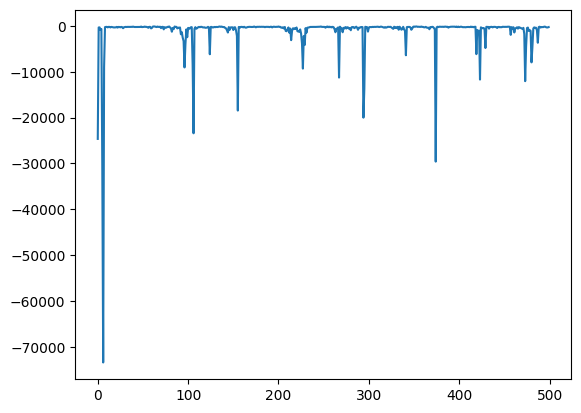

Episode 500/500.
Steps: 10, Avg Reward: -636.296


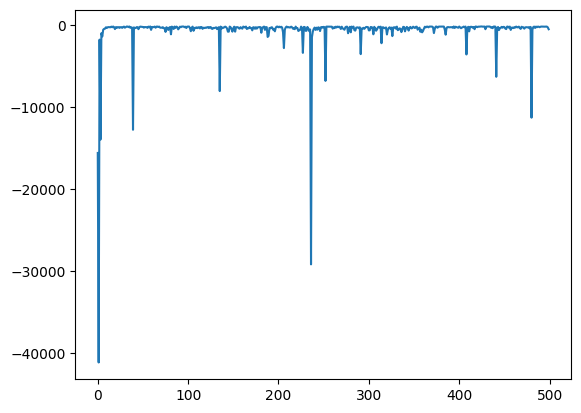

Episode 500/500.
Steps: 20, Avg Reward: -546.038


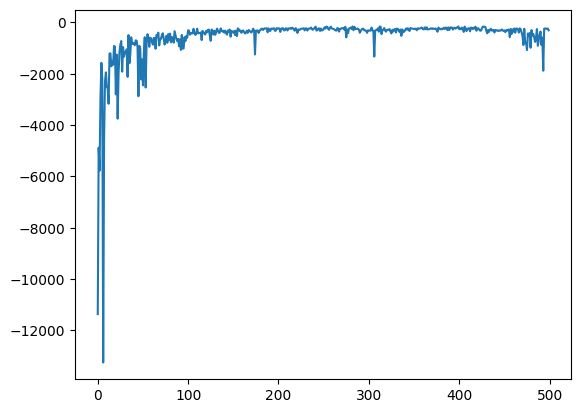

Episode 500/500.
Steps: 40, Avg Reward: -851.592


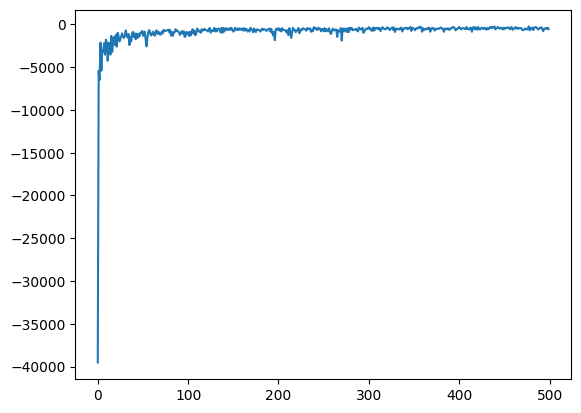

Episode 500/500.
Steps: 50, Avg Reward: -1030.228


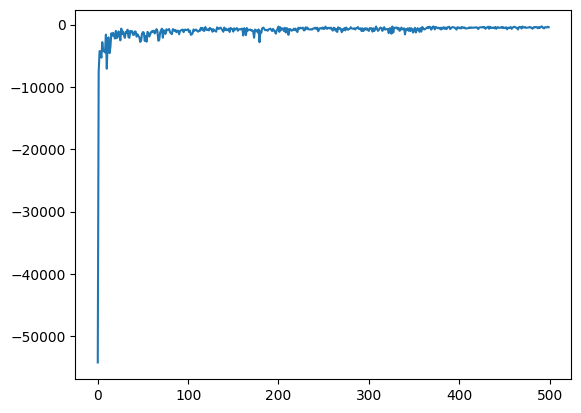

In [5]:
steps_range = [5, 10, 20, 40, 50]

for steps in steps_range:
    rewards = q_learning(env, steps)
    print(f"\nSteps: {steps}, Avg Reward: {np.mean(rewards)}")
    plt.plot(rewards)
    plt.show()